In [43]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(10,6)

In [44]:
df_iris = pd.read_csv('IRIS.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df_iris.shape

(150, 5)

In [46]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Applying EDA and Feature Engineering

In [48]:
df_species = df_iris['species'].value_counts()
df_species

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(df_iris.species)

LabelEncoder()

In [50]:
df_iris['Species_Encoded'] = lb.transform(df_iris['species'])

In [51]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [52]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_Encoded
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


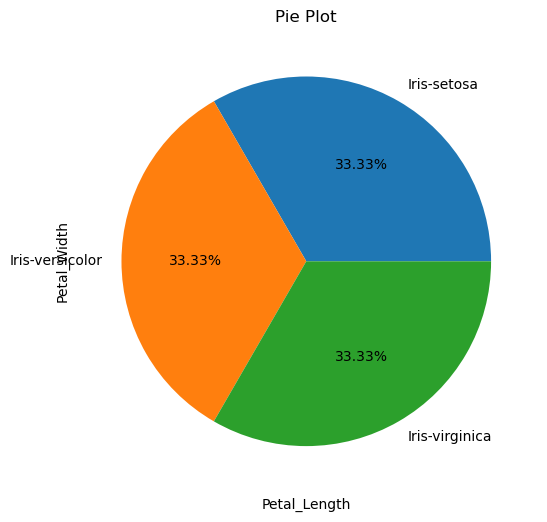

In [53]:
plt.title('Pie Plot')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.pie(df_species,labels = df_species.index,autopct='%1.2f%%')
plt.show()

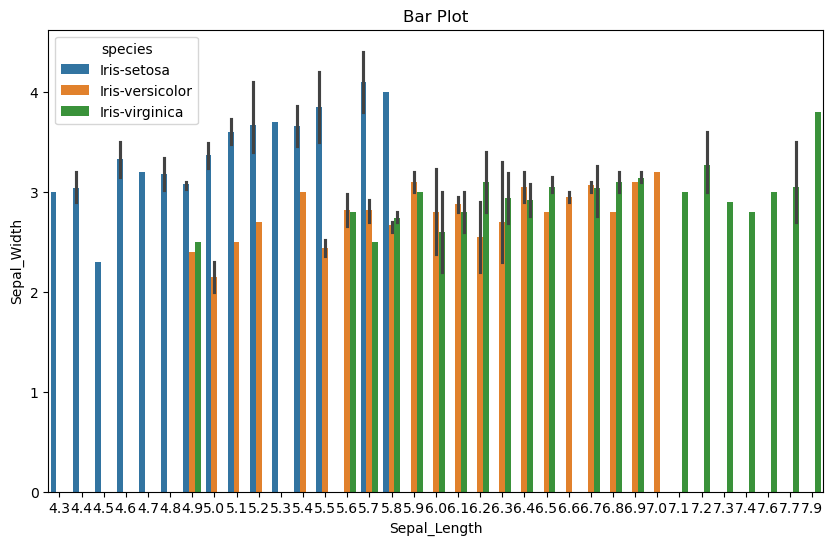

In [54]:
plt.title('Bar Plot')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
sns.barplot(x =df_iris['sepal_length'],y= df_iris['sepal_width'],hue = df_iris['species'])
plt.show()

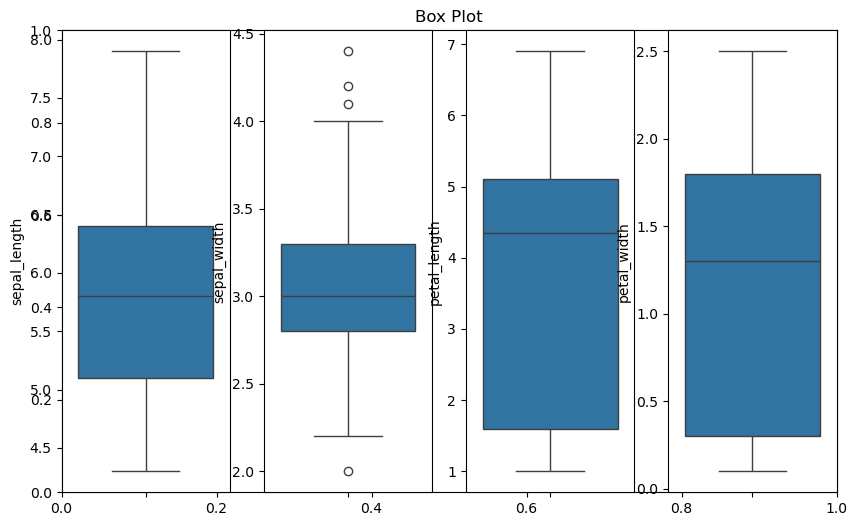

In [55]:
plt.title('Box Plot')

# plt.title('Sepal_Length')
plt.subplot(1,4,1)
sns.boxplot(df_iris['sepal_length'])

# plt.title('sepal_width')
plt.subplot(1,4,2)
sns.boxplot(df_iris['sepal_width'])

# plt.title('petal_length')
plt.subplot(1,4,3)
sns.boxplot(df_iris['petal_length'])

# plt.title('petal_width')
plt.subplot(1,4,4)
sns.boxplot(df_iris['petal_width'])

plt.show()


In [56]:
# As we find some outliers present in the sepal_width we are using IQR 

q1 = df_iris.sepal_width.quantile(0.25)
q3 = df_iris.sepal_width.quantile(0.75)
iqr = q3 - q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print('Before Removing Outliers:')
print(df_iris.sepal_width.shape)
outliers = df_iris.sepal_width[ (df_iris.sepal_width < lower) | (df_iris.sepal_width > upper) ]
print(outliers.head())

Before Removing Outliers:
(150,)
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64


In [57]:
filtered = df_iris.sepal_width[ (df_iris.sepal_width >= lower) & (df_iris.sepal_width <= upper) ]
print(filtered.head())
print('After Removing Outliers:')
print(filtered.shape)

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64
After Removing Outliers:
(146,)


In [58]:
df_iris['filtered_sepal_width'] = filtered

In [59]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_Encoded,filtered_sepal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,0,3.5
1,4.9,3.0,1.4,0.2,Iris-setosa,0,3.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,3.2
3,4.6,3.1,1.5,0.2,Iris-setosa,0,3.1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,3.6


In [60]:
df_iris.isnull().sum()

sepal_length            0
sepal_width             0
petal_length            0
petal_width             0
species                 0
Species_Encoded         0
filtered_sepal_width    4
dtype: int64

In [61]:
print(df_iris.filtered_sepal_width.mean())
print(df_iris.filtered_sepal_width.median())

3.036986301369863
3.0


In [62]:
df_iris.filtered_sepal_width.fillna(df_iris.filtered_sepal_width.median(),inplace=True)

In [63]:
df_iris.isnull().sum()

sepal_length            0
sepal_width             0
petal_length            0
petal_width             0
species                 0
Species_Encoded         0
filtered_sepal_width    0
dtype: int64

In [64]:
df_iris.dtypes

sepal_length            float64
sepal_width             float64
petal_length            float64
petal_width             float64
species                  object
Species_Encoded           int32
filtered_sepal_width    float64
dtype: object

In [65]:
df_iris.filtered_sepal_width = df_iris.filtered_sepal_width.astype('float64')

In [66]:
df_iris.dtypes

sepal_length            float64
sepal_width             float64
petal_length            float64
petal_width             float64
species                  object
Species_Encoded           int32
filtered_sepal_width    float64
dtype: object

In [67]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_Encoded,filtered_sepal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,0,3.5
1,4.9,3.0,1.4,0.2,Iris-setosa,0,3.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,3.2
3,4.6,3.1,1.5,0.2,Iris-setosa,0,3.1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,3.6


In [80]:
X = df_iris.drop(columns = ['species', 'sepal_width','Species_Encoded'])
y = df_iris['Species_Encoded']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Model Score:",model.score(X_train,y_train))
pred = accuracy_score(y_pred,y_test)
print('Linear Regresssion:',pred)

Model Score: 0.975
Linear Regresssion: 1.0


In [82]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("Model Score:",model.score(X_train,y_train))
pred = accuracy_score(y_pred,y_test)
print('Decision Tree:',pred)

Model Score: 0.975
Decision Tree: 0.9666666666666667


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
def predict_species(sepal_length, petal_length, petal_width, filtered_sepal_width):
    # Create a NumPy array from the input variables
    input_data = np.array([[sepal_length, petal_length, petal_width, filtered_sepal_width]])
    
    # Use the trained model to make a prediction
    prediction = model.predict(input_data)
    
    # Return the prediction (0 = Setosa, 1 = Versicolor, 2 = Virginica)
    return prediction[0]

def get_user_input():
    # Get user input for each feature
    sepal_length = float(input("Enter Sepal Length (cm): "))
    petal_length = float(input("Enter Petal Length (cm): "))
    petal_width = float(input("Enter Petal Width (cm): "))
    filtered_sepal_width = float(input("Enter Sepal Width (cm): "))
    
    return sepal_length, petal_length, petal_width, filtered_sepal_width

# Get user input
sepal_length, petal_length, petal_width, filtered_sepal_width = get_user_input()

# Make a prediction
species_prediction = predict_species(sepal_length, petal_length, petal_width, filtered_sepal_width)

# Print the result
if (species_prediction == 0):
    print("Predicted: Setosa")
elif (species_prediction == 1):
    print("Predicted: Versicolor")
else:
    print("Predicted: Virginica")





Predicted: Versicolor
